# Plot fitting region diagnostic

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup python environment
from matplotlib.pyplot import *
from numpy import *
from positive import *
from glob import glob
from xcp import determine_data_fitting_region
import xcp

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from XCP.
(xcp.core)>> Catalog of calibration runs stored to "xcp.calibration_catalog"
(xcp.core)>> Metadata dictionary for calibration runs stored to "xcp.metadata_dict"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"
(xcp.core)>> According to the global config, the XCP package is configured to model the ['[(2', '2)', '(3', '3)]'] coprecessing moment multipole moment(s)


In [8]:
lmlist = eval(','.join(xcp.core.gc.lm))

### Preliminaries

In [9]:
#
package_dir = parent( xcp.__path__[0] )
datadir = package_dir + 'data/version2/'

#
l,m = 3,3

#
files = glob( datadir+'q*l%im%i.txt'%(l,m) )

files = [ f for f in files if 'q4a08t60dPm3dRm250_T_96_384' in f]
files.sort()

#
data = []
for f in files:
    alert('Loading %s'%red(f))
    data.append(loadtxt(f).T)
    #
#     break

(notebook)>> Loading /Users/book/KOALA/PhenomXCP/data/version2/q4a08t60dPm3dRm250_T_96_384_l3m3.txt


(xcp.core)>> Catalog of calibration runs stored to "xcp.calibration_catalog"
(xcp.core)>> Metadata dictionary for calibration runs stored to "xcp.metadata_dict"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"
(notebook)>> Plotting
q4a08t60dPm3dRm250_T_96_384



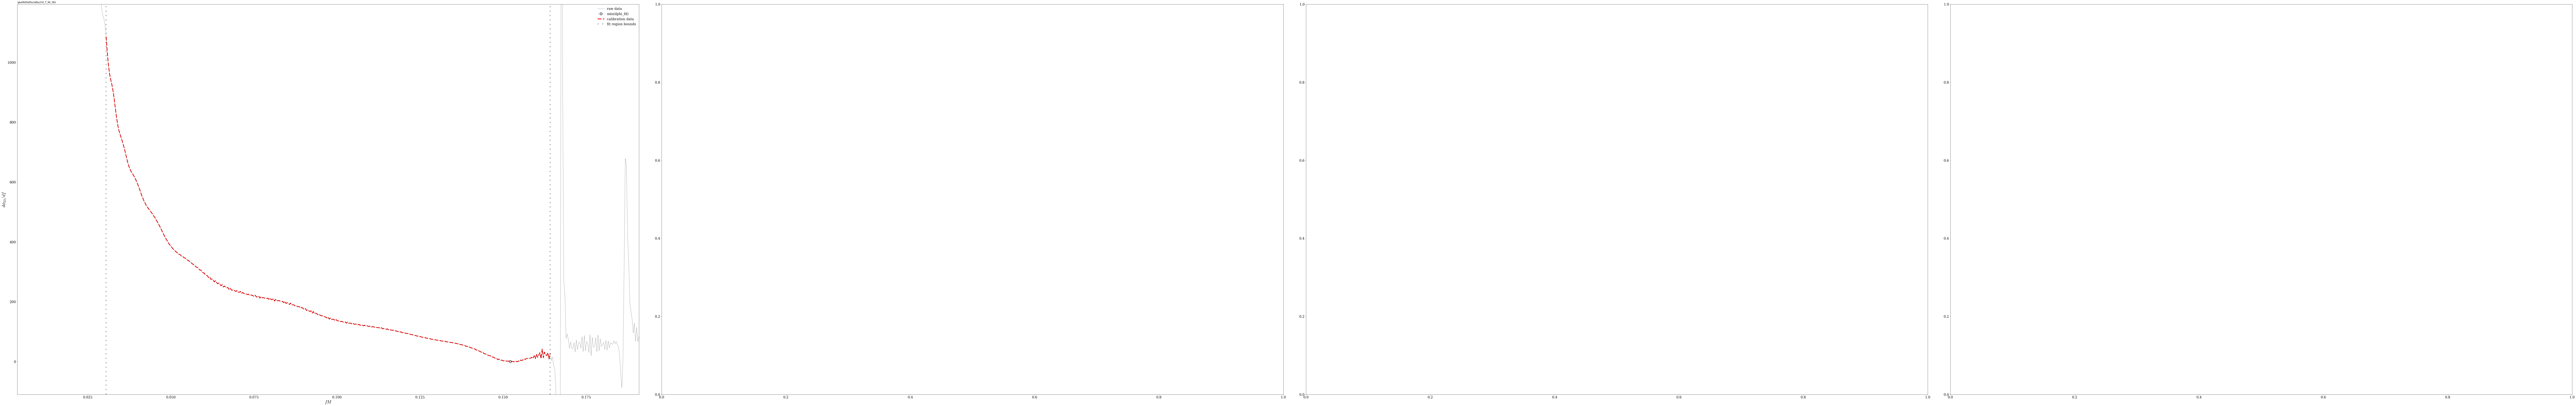

In [30]:
#
n = 4
fig,ax = subplots( int(ceil(len(data)/n)), n, figsize=12*figaspect(  0.618 * ceil(len(data)/n) / n  ), sharex=False )
ax = ax.flatten()

#
tight_layout(0,2,4)

#
alert('Plotting')
for k in range(len(data)):
    
    #
    # print( '.',end='')
    print(files[k].split('/')[-1].split('.')[0].split('_l')[0])

    # SELECT AND UNPACK DATA
    # ---
    
    #
    if k==len(ax): break
    sca( ax[k] )

    # Select and unpack
    f,amp_fd,dphi_fd,alpha,beta,gamma = data[k]
    
    # DETERMINE DATA FITTING REGION
    # ---
    calibration_data, dphi_lorentzian_min, f_min, f_max, f_lorentzian_min = determine_data_fitting_region( data[k] )
    
    #
    calibration_f, calibration_amp_fd, calibration_dphi_fd, calibration_alpha, calibration_beta, calibration_gamma = calibration_data.T
    
    # Plot RAW data
    # ---
    domain  = f
    codomain = dphi_fd - dphi_lorentzian_min
    plot(domain,codomain,lw=1,color='k',alpha=0.5,label='raw data')
    
    # Note location of min
    # ---
    
    plot( f_lorentzian_min, 0, marker='o', ms='12', mfc='none', mec='k', mew=2,label='min(dphi_fd)' )
    
    # Plot calibration region
    domain4 = calibration_f
    codomain4 = calibration_dphi_fd
    plot( domain4, codomain4, lw=4, color='r', zorder=-10, alpha=1, ls='--', label='calibration data' )
    axvline( min(domain4), color='k', lw=6, ls=':' , alpha=0.3, label='fit region bounds')
    axvline( max(domain4), color='k', lw=6, ls=':' , alpha=0.3)
    
    # Other annotations
    # ---
    
    #
    xlim( lim(domain4,dilate=0.2) )
    ylim( limy(domain4,codomain4,dilate=0.1) )
    xlabel('$f M$')
    ylabel('$d\phi_{%i%i}/df$'%(l,m))
    
    #
    title(files[k].split('/')[-1].split('.')[0].split('_l')[0],loc='left',size=12)
    legend()

    
#
file_path = datadir+'dphi_fitting_region_diagnostic_l%im%i.pdf'%(l,m)
print('')
# alert('Saving batch plot to %s'%magenta(file_path))
# savefig(file_path,pad_inches=2, bbox_inches = "tight")
# alert('\nDone.')

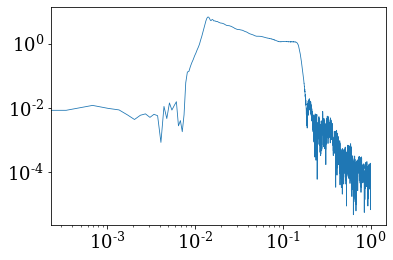

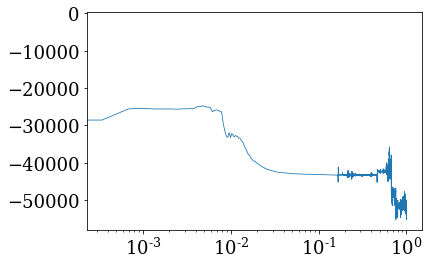

In [14]:
plot(f,amp_fd)
xscale('log')
yscale('log')

figure()
plot(f,dphi_fd)
xscale('log')

(notebook)>> Plotting ...
.

TypeError: determine_data_fitting_region() got an unexpected keyword argument 'fmin'

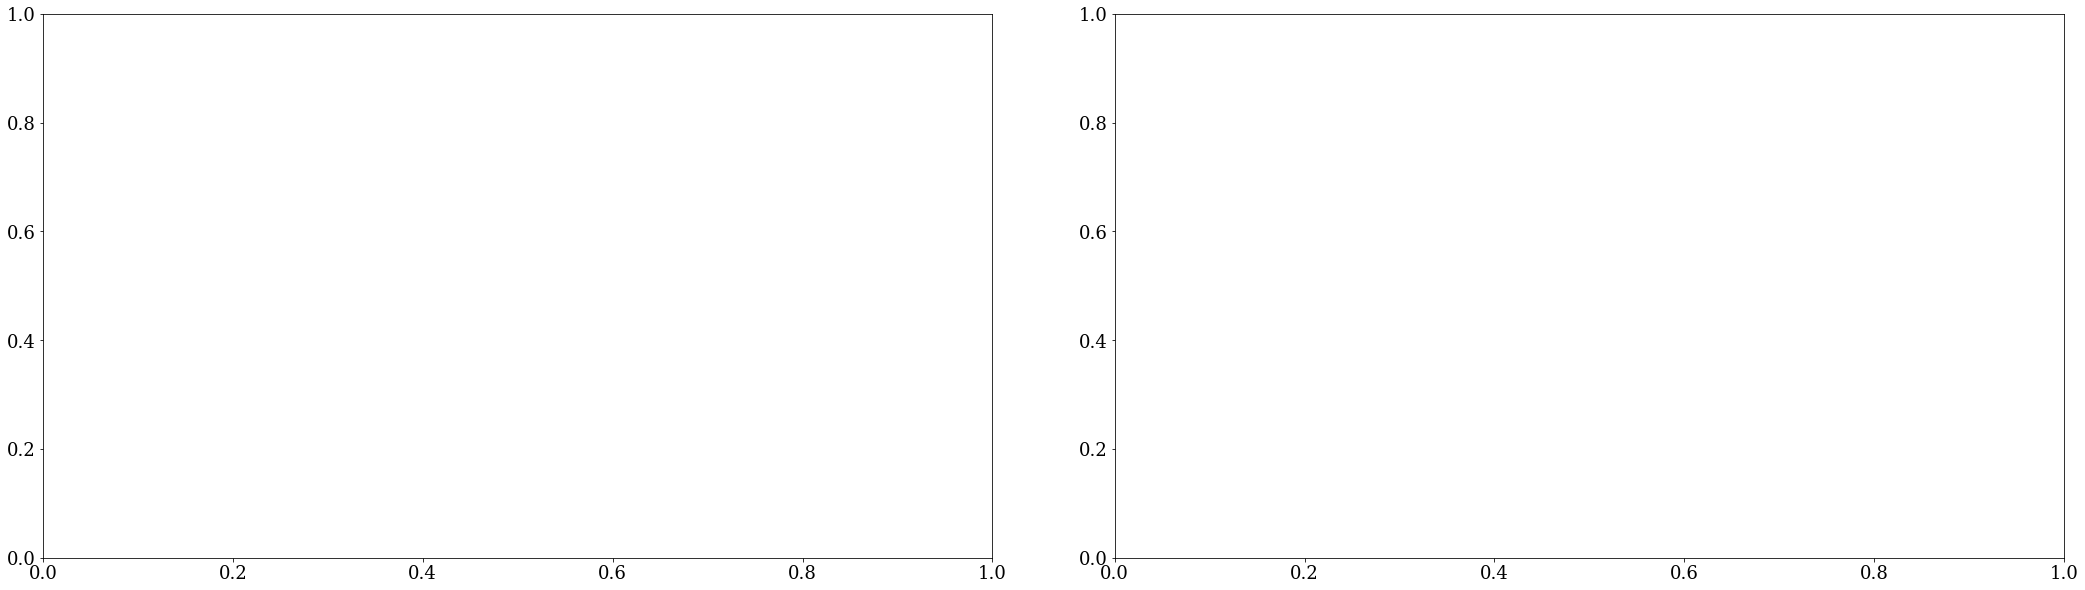

In [169]:
#
fig,ax = subplots( 1, 2, figsize=2*figaspect(0.9*1*0.618/2), sharex=True )
ax = ax.flatten()

#
tight_layout(0,0,4)

#
alert('Plotting ...')
for k in range(len(data)):
    
    #
    if 'q2_a10_a28_ph0_th150' in files[k]:

        #
        print( '.',end='')

        # SELECT AND UNPACK DATA
        # ---

        #
        if k==len(ax): break

        # Select and unpack
        f,amp_fd,dphi_fd,alpha,beta,gamma = data[k]

        # Select fitting region
        fmin=0.03
        fmax=0.0850
        new_data,new_knot,new_fmin,new_fmax,f_knot = determine_data_fitting_region(data[k],fmin=fmin,fmax=fmax)

        # Unpack the new data
        f_new,amp_fd_new,dphi_fd_new,alpha_new,beta_new,gamma_new = new_data.T



        # PLOT AMPLITUDE INFORMATION
        # ---

        #
        if k==len(ax): break
        sca( ax[0] )

        #
        domain = f
        codomain = amp_fd

        #
        plot( domain[new_knot], codomain[new_knot], color='k', mfc='none', marker='o', ms=20, mew=2, alpha = 1  )
        axvline( new_fmin, color='k', ls='-',lw=8,alpha = 0.15 )
        axvline( new_fmax, color='k', ls='-',lw=8,alpha = 0.15 )

        #
        plot( domain, codomain, color='k', ls='-', label=r'cp-$\psi_4$-fd',lw=2, alpha=0.2 )

        #
        plot( f_new, amp_fd_new, alpha=0.8, color='b', ls='-', label=r'calibration data',lw=2 )

        #
        xscale('log')
        yscale('log')

        #
        x_dilate = 1.2
        xlim( new_fmin/x_dilate,new_fmax*x_dilate )
        ylim( limy( domain, codomain, dilate=x_dilate ) )
        # ylim(1e-4,1e2)

        #
        legend(ncol=2,loc=3,frameon=True)
        ylabel(r'$|\tilde{h}_{22}(f)|$')
        title(files[k].split('/')[-1].split('.')[0],loc='left',size=20)



        # PLOT PHASE DERIVATIVE INFORMATION
        # ---

        #
        if k==len(ax): break
        sca( ax[1] )

        #
        adjust = lambda DOMAIN,X: X - min(X[ (DOMAIN>fmin) & (DOMAIN<fmax) ])

        #
        domain = f
        codomain = adjust(domain,dphi_fd)
        #
        #plot( f_new[argmin(dphi_fd_new)], min(dphi_fd_new), color='k', mfc='none', marker='o', ms=20, mew=2, alpha = 1  )
        plot( domain[new_knot], codomain[new_knot], color='k', mfc='none', marker='o', ms=20, mew=2, alpha = 1  )
        plot( domain, codomain, color='k', ls='-', label=r'cp-$\psi_4$-fd',lw=2, alpha=0.2 )

        #
        axvline( new_fmin, color='k', ls='-',lw=8,alpha = 0.15 )
        axvline( new_fmax, color='k', ls='-',lw=8,alpha = 0.15 )

        #

        #
        domain = f_new
        codomain = adjust(domain,dphi_fd_new)
        #
        plot( domain, codomain, alpha=0.8, color='b', ls='-', label=r'calibration data',lw=2 )

        #
        #xlim(0.002,0.2)
        ylim( limy(domain,codomain,dilate=0.1) )

        #
        xscale('log')

        #
        legend(ncol=2,loc=3,frameon=True)
        ylabel(r'$|\tilde{h}_{22}(f)|$')
        title(files[k].split('/')[-1].split('.')[0],loc='left',size=20)
        
        break

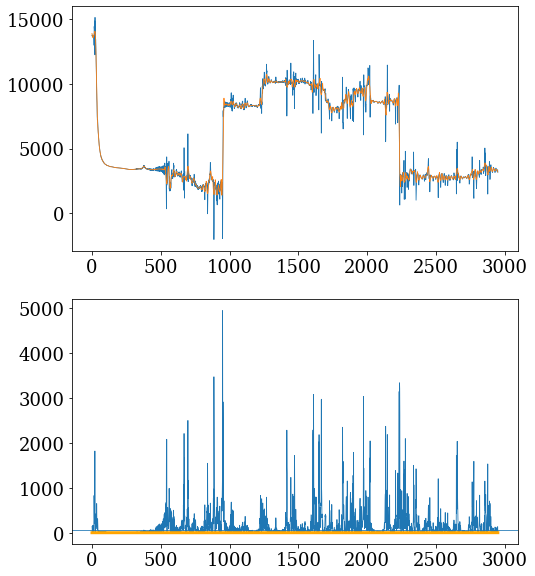

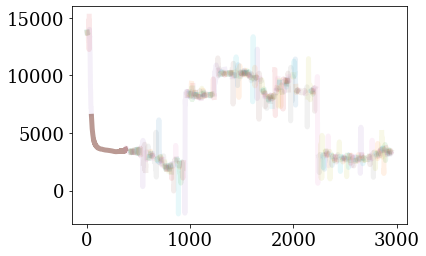

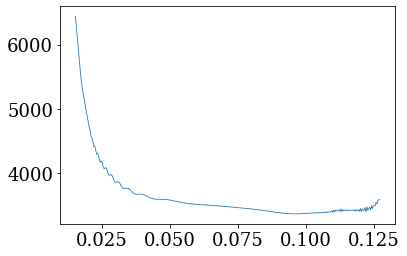

In [186]:
mask1 = smoothest_part_by_threshold( dphi_fd[f>0], threshold=0.01, smooth_width=20, plot=True )
figure()
plot(f[f>0][mask1],dphi_fd[f>0][mask1])

[238 290 293 295 297 300 302 305 308]
[269 271 273 276 278 281 283 285 288 290 292 295 297 300 307 310 312 315
 317 320 322 329 331 334 336 339 343 345 351 362]


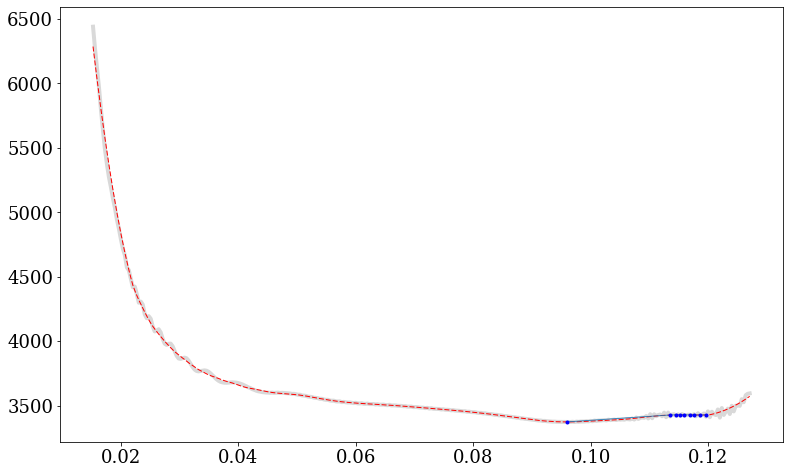

In [188]:
figure( figsize=2*figaspect(0.618) )


plot(f[f>0][mask1],dphi_fd[f>0][mask1],lw=4,color='k',alpha=0.15)

domain   = f[f>0][mask1]
codomain = smooth(dphi_fd[f>0][mask1],width=40).answer
plot(domain,codomain,lw=1,color='r',ls='--')


# local_mins = localmins(codomain)[0]
# mins = [ local_min in local_mins ]
pks,locs = findpeaks( codomain )


# [axvline( domain[local_min] ) for local_min in local_mins]
 
# xlim( lim(domain[local_mins]) )

print(locs)
print( local_mins )
plot( domain[locs], codomain[locs], ls=None, marker='o', mfc='none', ms=2, mew=2, mec='b' )